In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
pwd

'C:\\Users\\ra285594'

In [9]:
cd C:\Users\ra285594\datasets\csv

C:\Users\ra285594\datasets\csv


In [10]:
credit = pd.read_csv('credit_card_default.csv')

In [11]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Total Defaults,Total Bill Amount,Total Pay Amount,Overall Outstanding,default payment next month
0,20000,2,2,1,24,2,2,0,0,0,0,2,7704,689,7015,1
1,120000,2,2,2,26,0,2,0,0,0,2,2,17077,5000,12077,1
2,90000,2,2,2,34,0,0,0,0,0,0,0,101653,11018,90635,0
3,50000,2,2,1,37,0,0,0,0,0,0,0,231334,8388,222946,0
4,50000,1,2,1,57,0,0,0,0,0,0,0,109339,59049,50290,0


In [12]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Total Defaults,Total Bill Amount,Total Pay Amount,Overall Outstanding,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,0.834200,2.698617e+05,3.165139e+04,2.382103e+05,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,1.554303,3.795643e+05,6.082768e+04,3.631651e+05,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-3.362590e+05,0.000000e+00,-2.671514e+06,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.868800e+04,6.679750e+03,4.520750e+03,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.263110e+05,1.438300e+04,1.019230e+05,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,3.426265e+05,3.350350e+04,3.057178e+05,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,6.000000,5.263883e+06,3.764066e+06,4.116080e+06,1.000000


In [13]:
age_arr=[0,9,19,29,39,49,59,69,79]
age_arr_grp= ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
credit['AGE_GRP']= pd.cut(credit['AGE'], bins=age_arr, labels= age_arr_grp)

In [14]:
d1= credit.groupby(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GRP'])['default payment next month'].sum().reset_index()

In [16]:
d2= credit.groupby(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GRP'])['default payment next month'].count().reset_index()
d3=pd.merge(d1,d2, on=['SEX','EDUCATION', 'MARRIAGE', 'AGE_GRP'])
d3['Default Percent']= (d3['default payment next month_x']/d3['default payment next month_y'])*100
d3.drop(['default payment next month_x','default payment next month_y'], axis =1, inplace= True)
credit_new = pd.merge(credit,d3,on=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GRP'])

In [17]:
credit_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 18 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
Total Defaults                30000 non-null int64
Total Bill Amount             30000 non-null int64
Total Pay Amount              30000 non-null int64
Overall Outstanding           30000 non-null int64
default payment next month    30000 non-null int64
AGE_GRP                       30000 non-null category
Default Percent      

In [18]:
credit_new.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Total Defaults,Total Bill Amount,Total Pay Amount,Overall Outstanding,default payment next month,AGE_GRP,Default Percent
0,20000,2,2,1,24,2,2,0,0,0,0,2,7704,689,7015,1,20-29,27.764128
1,400000,2,2,1,29,0,0,0,0,0,0,0,2284140,109029,2175111,0,20-29,27.764128
2,80000,2,2,1,23,1,2,3,2,0,0,4,61950,4121,57829,0,20-29,27.764128
3,80000,2,2,1,29,0,0,2,0,0,0,1,323559,8800,314759,0,20-29,27.764128
4,60000,2,2,1,24,0,0,0,0,0,0,0,222443,10837,211606,1,20-29,27.764128
5,150000,2,2,1,25,0,0,0,0,0,0,0,7104,1264,5840,0,20-29,27.764128
6,120000,2,2,1,29,0,0,0,0,0,0,0,7765,8715,-950,0,20-29,27.764128
7,300000,2,2,1,27,1,0,0,0,0,0,1,5215,5215,0,0,20-29,27.764128
8,230000,2,2,1,28,0,0,0,0,0,0,0,55327,11750,43577,1,20-29,27.764128
9,120000,2,2,1,25,0,0,0,0,0,0,0,47869,6000,41869,0,20-29,27.764128


In [19]:
d1.head(10)

,SEX,EDUCATION,MARRIAGE,AGE_GRP,default payment next month
0,1,0,1,30-39,0
1,1,0,1,40-49,0
2,1,0,2,20-29,0
3,1,0,2,30-39,0
4,1,0,2,40-49,0
5,1,1,0,30-39,0
6,1,1,1,20-29,12
7,1,1,1,30-39,142
8,1,1,1,40-49,156
9,1,1,1,50-59,66


In [20]:
m_status = pd.get_dummies(credit_new['MARRIAGE'],prefix='M')

In [21]:
edu=pd.get_dummies(credit_new['EDUCATION'], prefix = 'E')

In [23]:
sex = pd.get_dummies(credit_new['SEX'], prefix='S')

In [24]:
age=pd.get_dummies(credit_new['AGE_GRP'], prefix ='A')

In [25]:
credit_new.drop(['SEX', 'MARRIAGE','EDUCATION','AGE_GRP', 'PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6'], axis=1, inplace=True)

In [26]:
credit_new = pd.concat([credit_new, m_status,edu,sex,age],axis=1)

In [27]:
credit_new.head()

,LIMIT_BAL,AGE,Total Defaults,Total Bill Amount,Total Pay Amount,Overall Outstanding,default payment next month,Default Percent,M_0,M_1,...,S_1,S_2,A_0-9,A_10-19,A_20-29,A_30-39,A_40-49,A_50-59,A_60-69,A_70-79
0,20000,24,2,7704,689,7015,1,27.764128,0,1,...,0,1,0,0,1,0,0,0,0,0
1,400000,29,0,2284140,109029,2175111,0,27.764128,0,1,...,0,1,0,0,1,0,0,0,0,0
2,80000,23,4,61950,4121,57829,0,27.764128,0,1,...,0,1,0,0,1,0,0,0,0,0
3,80000,29,1,323559,8800,314759,0,27.764128,0,1,...,0,1,0,0,1,0,0,0,0,0
4,60000,24,0,222443,10837,211606,1,27.764128,0,1,...,0,1,0,0,1,0,0,0,0,0


In [28]:
credit_new.drop(['AGE', 'Total Bill Amount', 'Total Pay Amount','default payment next month'], axis=1, inplace=True)

In [29]:
credit_new.head()

,LIMIT_BAL,Total Defaults,Overall Outstanding,Default Percent,M_0,M_1,M_2,M_3,E_0,E_1,...,S_1,S_2,A_0-9,A_10-19,A_20-29,A_30-39,A_40-49,A_50-59,A_60-69,A_70-79
0,20000,2,7015,27.764128,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,400000,0,2175111,27.764128,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,80000,4,57829,27.764128,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,80000,1,314759,27.764128,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,60000,0,211606,27.764128,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = credit_new.drop(['Default Percent'],axis=1)
y =credit_new['Default Percent']
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.30)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
Linear_Reg = LinearRegression()

In [34]:
Linear_Reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predictions = Linear_Reg.predict(x_test)

In [36]:
pred_train = Linear_Reg.predict(x_train)

Text(0, 0.5, 'Predicted Values')

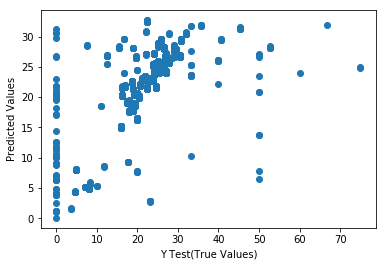

In [37]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')

In [38]:
from sklearn import metrics

In [39]:
test_mae =('MAE', metrics.mean_absolute_error(y_test,predictions))
test_mse = ('MSE', metrics.mean_squared_error(y_test, predictions))
test_rmse =('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(test_mae,test_mse,test_rmse)
e_test= {'E_TEST':[metrics.mean_absolute_error(y_test,predictions), metrics.mean_squared_error(y_test,predictions),np.sqrt(metrics.mean_squared_error(y_test,predictions))]}
df_err_test = pd.DataFrame(e_test, index=['MAE','MSE', 'RMSE'])

('MAE', 1.5136795926579907) ('MSE', 8.67488345335269) ('RMSE', 2.9453155099840647)


In [40]:
metrics.explained_variance_score(y_test, predictions)

0.6386125320212745

In [41]:
train_mae=('MAE', metrics.mean_absolute_error(y_train,pred_train))
train_mse=('MSE', metrics.mean_squared_error(y_train, pred_train))
train_rmse=('RMSE', np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
print(train_mae,train_mse,train_rmse)
e_train= {'E_TRAIN':[metrics.mean_absolute_error(y_train,pred_train), metrics.mean_squared_error(y_train,pred_train),np.sqrt(metrics.mean_squared_error(y_train,pred_train))]}
df_err_train = pd.DataFrame(e_train, index=['MAE','MSE', 'RMSE'])

('MAE', 1.467518064309451) ('MSE', 7.51979934368346) ('RMSE', 2.742225254001476)


In [42]:
err= pd.concat([df_err_test, df_err_train], axis =1,)
print(err)

        E_TEST   E_TRAIN
MAE   1.513680  1.467518
MSE   8.674883  7.519799
RMSE  2.945316  2.742225


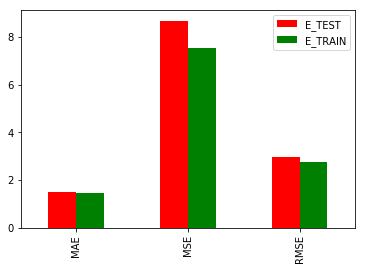

In [43]:
err.plot(kind='bar', color=['red', 'green'])